Lab03
=====

###  Context
#### Generative Adversarial Network
   + GAN

## GAN
GAN은 한국말로 적대적 생성 신경망이라고 합니다.<br>
이름에서 알 수 있듯 Discriminator(판별자)와 Generator(생성자)라는 두 모듈이 서로 대립하며 학습을 하는 신경망을 말합니다.<br> 
또한 비지도학습 모델의 하나로 대표적인 생성 모델입니다.

![GAN](./Images/GAN.jpg)

### 위조 지폐범과 경찰
GAN이라는 모델을 설명하는 예시로써, 판별자와 생성자의 관계를 경찰과 위조 지폐범으로 비유합니다. <br>
위조 지폐범은 경찰을 속이기 위해 더욱 정교하게 위조 지폐를 만들고, 경찰은 그런 위조 지폐를 더욱 잘 감별할 수 있도록 노력합니다. <br>
이런 식으로 판별자와 생성자가 서로 대립하며 학습하게 되고, <br>
판별자가 진짜와 가짜를 구분할 수 없을 값을 생성자가 만들어 내는 것을 목표로 합니다.


![GAN_Example](./Images/GAN_Example.png)

### 어떻게 모델에게 학습 방법을 적용할 수 있을까요?
GAN의 구조에서 확인할 수 있듯 판별자는 진짜 데이터와 가짜 데이터를 번갈아 학습하게 됩니다. <br>
생성자는 판별자가 가짜 데이터를 진짜 데이터라고 판별 하도록 학습을 진행합니다.<br>
이런 복잡한 학습 방법을 모델에게 유도할 수 있는 GAN의 비용 함수를 보여드리겠습니다.<br><br>
$$min_Gmax_DV(D,G) = E_{x~p_{data}(x)}[logD(x)] + E_{z~p_x(z)}[log(1-D(G(z)))$$<br>
GAN의 비용함수는 Value function인 V(D,G)를 최대화하는 D와 최소화하는 G를 찾는 minmax 문제를 푸는 것과 같습니다.<br>
판별자 함수 D(input)는 입력이 진짜 데이터라고 판별하면 1을 가짜 데이터라고 판별하면 0을 출력하는 함수입니다. <br>
생성자 함수 G(z)는 노이즈(z)를 입력으로 받아 가짜 데이터를 출력하는 함수입니다.

#### V(D,G)를 최대화하는 D
V를 최대화 하는 D에 대해 살펴보겠습니다. <br>첫 번째 term에서 x는 진짜 데이터를 의미하며, 진짜와 가짜를 잘 판별하는 판별자의 경우 항상 1을 출력하게 됩니다.<br>
여기에서 log1 = 0이므로 두 번째 term만 남게됩니다. 두 번째 term에서는 D(G(z)), 즉 노이즈(z)로 부터 생성된 데이터 G(z)를 판별자가 판별하게 됩니다. <br>
이런 경우 잘 판별하는 판별자의 경우에는 0을 출력하므로 두 번째 term도 log1이 되어 0이 됩니다. 이 경우가 V를 최대화하는 D의 경우입니다 .

#### V(D,G)를 최소화하는 G
V를 최소화 하는 G에 대해 살펴보겠습니다. <br>
첫 번째 term에는 G 함수가 존재하지 않기 때문에 두 번째 term만 살펴보면 됩니다. <br>
V를 최소화 하기 위해서는 D(G(z))이 1 값이 나와야 하며, 판별자를 잘 속이는 방향으로 생성자가 학습한다는 의미입니다. <br>이 경우가 V를 최소화하는 G의 경우입니다.

* 조금 더 복잡한 수식과 증명이 있지만, 이번 교육의 목적은 깊은 이해 보다는 간단하게 개념을 이해하고 사용하는 방법을 익히는 것이 목적이기 때문에 가볍게 이해하시면 됩니다.

### 생성자가 저지르는 반칙, Mode Collapse
GAN이 혁신적인 생성 모델인 것은 분명하지만, Mode Collapse라는 문제점이 존재합니다.<br><br>
만약에 본인이 위조지폐범이고, 위조한 만원짜리 지폐를 경찰이 무조건 진짜라고 판별한다면 어떤 지폐를 만드시겠습니까? <br>
당연히 보다 만들기 쉬운 지폐를 만들게 됩니다<br><br>
Mode Collapse 문제는 생성자가 판별자의 입장에서 진짜라고 판별하는 데이터 중 만들기 쉬운 데이터만을 생성하는 것을 뜻합니다.<br>
위에서 살펴본 V(D,G)를 최소화하는 G의 입장에서는 D가 고정된 상황에서 D를 가장 헷갈리게 하는 출력만을 만들어내면 V(D,G)를 최소화 할 수 있습니다.<br>
Mode Collapse는 GAN 모델에서 쉽게 겪을 수 있는 문제 중 하나이며, 이를 개선하기위해 여러가지 방법으로 연구가 진행되고 있습니다. <br>
특별한 장치 없이 Mode Collapse를 줄이기 위한 방법으로 생성자와 판별자를 번갈아가며 학습시킬 때 판별자를 2번 학습시키고, 생성자를 학습시키는 방식으로 간단하게 완화할 수 있지만, 본질적인 해결 방법이 될 수는 없습니다.

In [1]:
import warnings
warnings.filterwarnings("ignore")

from os.path import join

import numpy as np

import tensorflow as tf
from keras import layers, Input, models
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU

import matplotlib.pyplot as plt

datapath = join('data','MNIST')

# 케라스 백 엔드인 텐서플로우의 세션 설정을 불러옵니다.
from keras.backend.tensorflow_backend import set_session

# 텐서플로우의 ConfigProto() 객체에 학습시 적용할 옵션들을 명시적으로 설정할 수 있습니다.
config = tf.ConfigProto()
# GPU 옵션으로 allow_grouth를 True로 설정합니다.
config.gpu_options.allow_growth = True 

# 텐서플로우는 세션이라는 실행 단위를 가지고 있는데, 해당 세션에 적용할 옵션을 담고있는 Config객체를 전달합니다.
sess = tf.Session(config=config)
# 설정한 세션을 현재 프로세스에 적용합니다.
set_session(sess)  

Using TensorFlow backend.


## 1. 데이터 살펴보기
이번에 사용할 데이터는 손글씨 데이터로 유명한 MNIST 데이터 입니다.<br>
MNIST(Modified National Institute of Standards and Technology database)는 손으로 쓴 숫자들로 이루어진 대형 데이터셋 입니다.<br>
일반적으로 다양한 영상 처리 시스템을 트레이닝하기 위해 사용됩니다. 또한, 기계 학습 분야의 학습 및 검증에 널리 사용됩니다. <br>
MNIST 데이터셋은 28x28 픽셀의 흑백(Gray scale) 이미지입니다.<br>

![MNIST](./Images/MNIST.png)

data 디렉토리에 준비된 데이터와 라벨을 가져옵니다.<br>

In [2]:
x = np.load(join(datapath, 'MNIST.npy'))

In [3]:
x.shape

(60000, 28, 28)

## 2. 간단한 전처리
이전과 다르게 x 값의 범위를 -1 부터 1로 설정하겠습니다.

In [4]:
x = (x.reshape(-1, 784)/127.5) - 1.

## 3. keras로 GAN 모델링하기
### 3-1. 판별자 네트워크
먼저 판별자로 사용한 네트워크를 만들어 보겠습니다. <br>
특별한 구조가 필요한 것이 아닌 이전에 MLP 네트워크와 동일하게 작성하시면 됩니다.<br>
이전의 MLP 모델과의 차이점으로는 MNIST 데이터를 추정하는 MLP 모델의 출력 차원은 클래스의 개수(10개)로 되어있었습니다.<br>
하지만 판별자는 클래스의 번호를 추정하는 것이 아닌 진짜 데이터, 가짜 데이터인지를 판별하는 네트워크이므로 True(1), False(0)을 출력하도록 출력차원이 1개입니다.

In [5]:
# parameters
epochs = 20
batch_size = 1024
latent_dim = 100

In [6]:
# 판별자 생성 코드

# 판별자의 입력층(기존의 MLP 모델과 동일하게 입력은 784(28*28) 차원을 입력 차원으로 가집니다.)
dis_input_tensor = Input(shape = (784,))

# 판별자의 은닉층(MLP 모델의 은닉층과 동일하게 작성하시면 됩니다.)
dis_layer = layers.Dense(512, activation=LeakyReLU(alpha=0.2))(dis_input_tensor)
dis_layer = layers.Dense(256, activation=LeakyReLU(alpha=0.2))(dis_layer)

# 판별자의 출력층(가짜, 진짜를 판별하는 모델이므로 출력 차원은 1차원입니다.)
dis_output_tensor = layers.Dense(1, activation='sigmoid')(dis_layer)

# 판별자 모델 정의
discriminator = models.Model(dis_input_tensor, dis_output_tensor, name='Discriminator')

# 판별자 모델 생성(컴파일) 최적화기는 Adam, 비용 함수는 가짜, 진짜를 판별해야하므로 binary_crossentropy를 사용합니다.
discriminator.compile(optimizer=Adam(0.0005,0.5),
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


생성한 판별자 모델의 구조를 살펴봅니다.

In [7]:
discriminator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


### 3_2. 생성자 네트워크
다음은 생성자 네트워크입니다. <br>생성자 네트워크는 latent 벡터를 입력으로 받아 가짜 데이터를 생성하는 네트워크 입니다.<br>
이전의 Stacked AutoEncoder에서 Dense Layer로 실습했던 내용을 기억하시나요? <br>해당 네트워크에서 Decoder 부분이 생성자 네트워크입니다.<br>
입력 차원은 latent_dimension(100 차원)만큼이고, Dense Layer로 점점 크기를 키워 만들고자하는 가짜 데이터의 크기 784(28\*28) 차원으로 만들면 됩니다.

In [8]:
# 생성자 생성 코드
# 생성자의 입력층(기존의 AutoEncoder의 Decoder의 입력과 비슷하게 latent_dimension, 100차원 데이터를 입력으로 받습니다.)
gen_input_tensor = Input(shape = (latent_dim,))

# 생성자의 은닉층(AutoEncoder의 Decoder 부분과 동일한 구조로 작성하시면 됩니다.)
gen_layer = layers.Dense(256, activation=LeakyReLU(alpha=0.2))(gen_input_tensor)
gen_layer = layers.BatchNormalization(momentum=0.8)(gen_layer)
gen_layer = layers.Dense(512, activation=LeakyReLU(alpha=0.2))(gen_layer)
gen_layer = layers.BatchNormalization(momentum=0.8)(gen_layer)

# 생성자의 출력층(생성자의 목적은 가짜 데이터인 28*28 이미지를 생성하는 것이므로 출력은 784 차원이 됩니다.)
gen_output_tensor = layers.Dense(784, activation='tanh')(gen_layer)

# 생성자 모델 정의
generator = models.Model(gen_input_tensor, gen_output_tensor, name='Generator')
# 생성자는 바로 모델을 생성(컴파일)하지 않습니다. 판별자와 묶어 네트워크를 만들어야하기 때문입니다.

생성한 생성자 모델의 구조를 살펴봅니다.

In [9]:
generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               25856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               131584    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_6 (Dense)              (None, 784)               402192    
Total params: 562,704
Trainable params: 561,168
Non-trainable params: 1,536
_________________________________________________________________


### 3_3. 생성자 네트워크와 판별자 네트워크의 합성 네트워크
방금 생성자 네트워크를 만들고 모델을 정의했지만, 네트워크를 생성(컴파일)하지는 않았습니다. <br>
GAN의 비용 함수 중 $E_{z~p_x(z)}[log(1-D(G(z)))$를 살펴보겠습니다. <br>
수식을 보시면, 판별자 함수 D가 생성자 함수 G를 감싸고 있는 합성 함수 형태이기 때문에 생성자를 학습시키는 과정에서는 반드시 판별자의 도움이 필요합니다.<br>
따라서 합성 네트워크는 **'생성자'**만 학습이 되도록 설정해주어야 합니다. <br>
위에서 생성한 판별자는 이미 생성(컴파일)했으므로, 판별자를 학습시킬 수 없도록 설정한 후에 합성 네트워크를 생성하겠습니다.<br>

#### 그런데 여기에서 판별자를 학습시킬 수 없도록 설정하면 이전에 생성한 판별자 모델도 학습을 할 수 없지 않나요?
그렇지 않습니다. 이미 이전에 판별자 모델을 생성(컴파일)했기 때문에 생성한 모델은 학습할 수 있는 모델입니다.<br>
케라스는 모델을 다른 모델의 Layer로 사용할 수 있습니다.<br>
그렇기 때문에 합성 네트워크에 들어가는 판별자는 같은 판별자 모델이지만, 학습할 수 없도록 설정한 판별자 Layer로 작동합니다.

In [10]:
# 먼저 합성 네트워크에서 판별자 모델을 학습할 수 없도록 trainable 속성을 False로 설정합니다.
discriminator.trainable = False

# 입력은 정규 분포에서 생성되는 노이즈 입니다.
# 판별자 + 생성자 네트워크의 입력층
z = Input((latent_dim, ), name = 'noise_input')
# 생성자가 생성한 가짜 데이터
fake_img = generator(z)
# 생성자가 생성한 가짜 데이터를 판별기에 넣어 결과(출력)를 얻습니다.
validity = discriminator(fake_img)

# 정규 분포에서 나온 노이즈를 입력으로하고, 노이즈로부터 생성자가 생성한 가짜 데이터를 판별자가 판별한 출력(0, 1)을 출력층으로 
# 하는 모델을 정의합니다.
combined_model = models.Model(z, validity, name='Combined_Model')

# 판별자 + 생성자 모델 생성. 최적화기는 Adam, 비용 함수는 가짜, 진짜를 판별해야하므로 binary_crossentropy를 사용합니다.
combined_model.compile(optimizer=Adam(0.001,0.5),
                       loss='binary_crossentropy',
                       )

이제 생성자 네트워크를 학습할 수 있는 합성 네트워크의 구조를 살펴보겠습니다.<br>
위에서 설명드린대로 생성자와 판별자 네트워크가 합성 네트워크의 Layer와 동일하게 표현됨을 알 수 있습니다.

In [11]:
combined_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noise_input (InputLayer)     (None, 100)               0         
_________________________________________________________________
Generator (Model)            (None, 784)               562704    
_________________________________________________________________
Discriminator (Model)        (None, 1)                 533505    
Total params: 1,096,209
Trainable params: 561,168
Non-trainable params: 535,041
_________________________________________________________________


In [12]:
# 생성자에서 생성된 가짜 이미지를 살펴볼 수 있도록 하는 함수입니다.
def sample_images(epoch):
    print('epoch {}'.format(epoch+1))
    # 출력할 이미지의 개수 = 6*6 = 36개
    r, c = 6, 6
    # 생성자의 입력으로 사용할 노이즈 생성
    noise = np.random.normal(0, 1, (r * c, latent_dim))
    # 가짜 이미지 생성
    gen_imgs = generator.predict(noise)

    # 이미지 값의 범위를 0 ~ 1로 조정 (minmax 정규화)
    gen_imgs = 0.5 * gen_imgs + 0.5
    gen_imgs = np.reshape(gen_imgs, (-1, 28, 28, 1))
    # 이미지 출력 (6*6 총 36개)
    fig, axs = plt.subplots(r, c,figsize=(8,8))
    cnt = 0
    for i in range(r):
        for j in range(c):
            axs[i, j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1
    plt.show()
    plt.close()

### 3_4. GAN 모델 학습 시키기
처음에 설명드렸던 Mode Collapse를 기억하시나요? 간단히 Model Collapse를 피하는 방법은 뭘까요? <br>
판별자를 여러번 학습시키고, 생성자를 학습시키는 방식입니다.<br>
우선은 한번씩만 학습시켜보고 결과를 살펴보겠습니다.<br>
<br>
먼저 판별기에 정답 레이블을 만들겠습니다. <br>numpy.ones, numpy.zeros 함수를 사용하면, 주어진 차원대로 1과 0이 채워진 행렬을 반환합니다.

In [13]:
# 판별기에 진짜 데이터와 함께 넣을 진짜 데이터(1) 레이블 생성 (배치 사이즈, 1) 크기로 생성합니다.
valid = np.ones((batch_size, 1))

# 판별기에 생성기가 생성한 가짜 데이터와 함께 넣을 가짜 데이터(0) 레이블 생성 (배치 사이즈, 1) 크기로 생성합니다.
fake = np.zeros((batch_size, 1))

학습을 시작하겠습니다. <br><br>GAN 모델은 2개의 네트워크를 학습시켜야 하므로 기존에 사용했던 Model.fit() 함수를 사용할 수 없습니다.<br>
Model.fit() 함수를 실행할 때 epoch와 batch_size를 매개변수로 넘기면 알아서 1 epoch당 실행할 step의 수를 계산했지만, 이번에는 직접 계산해야합니다.<br>
그리고 모델을 학습 시킬때는 Model.train_on_batch(입력, 정답 label)라는 함수를 사용하겠습니다<br>
해당 함수는 batch_size만큼 준비된 데이터를 입력으로하여 학습합니다.<br>
이번에는 train_on_batch() 함수를 사용해보겠습니다.

Instructions for updating:
Use tf.cast instead.
epoch 1


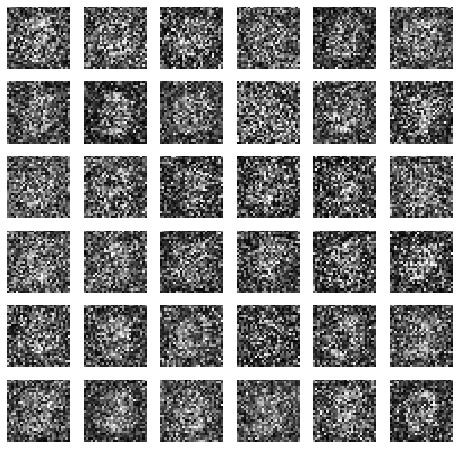

epoch 2


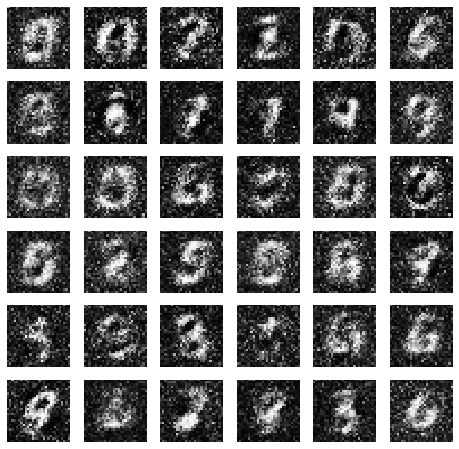

epoch 3


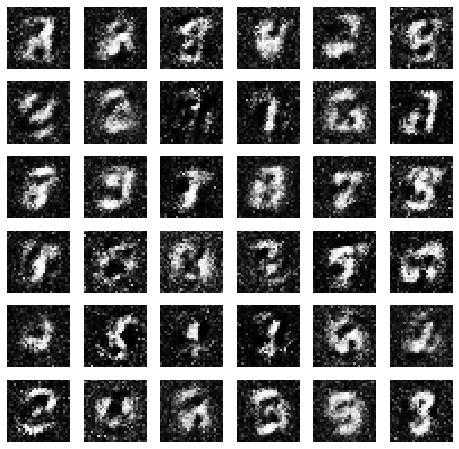

epoch 4


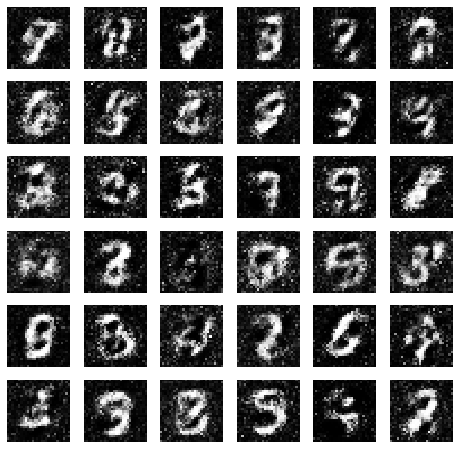

epoch 5


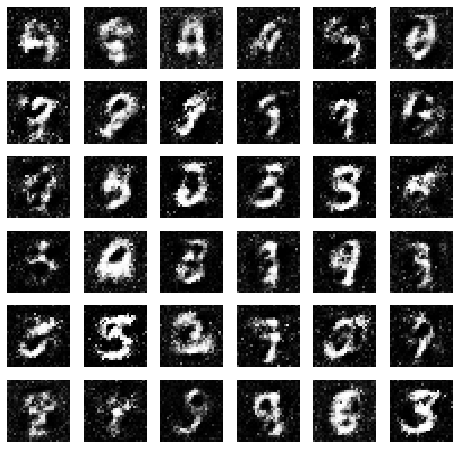

epoch 6


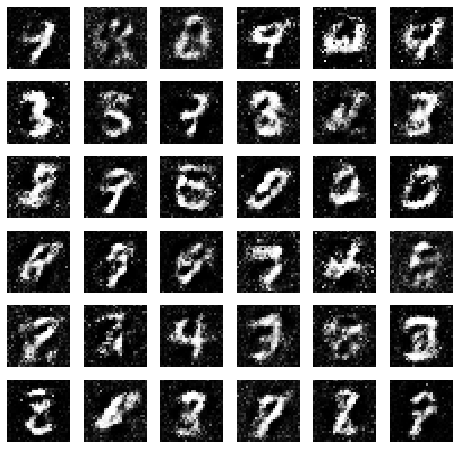

epoch 7


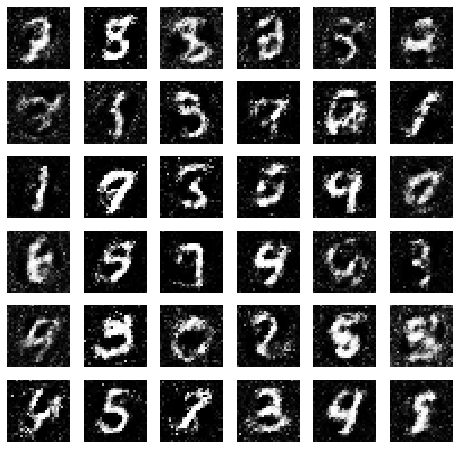

epoch 8


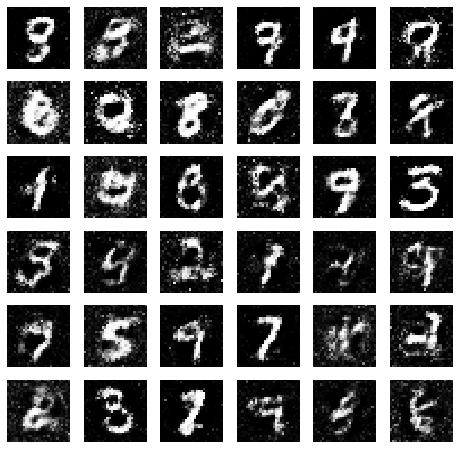

epoch 9


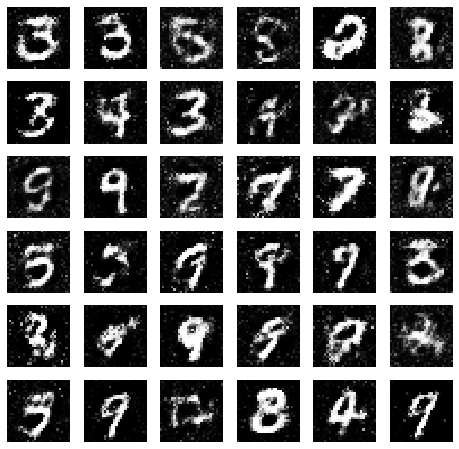

epoch 10


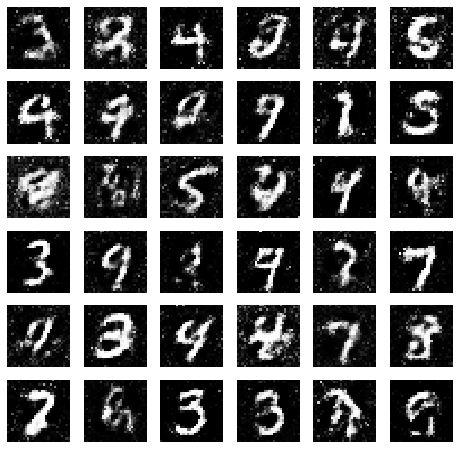

epoch 11


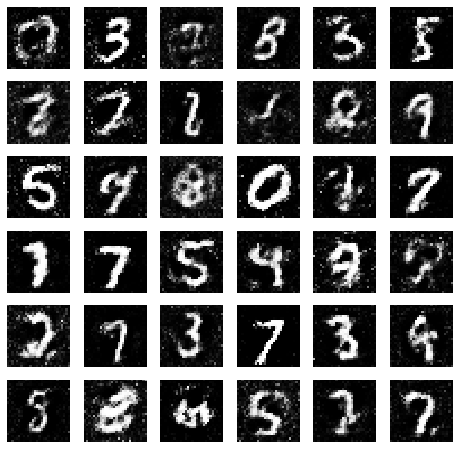

epoch 12


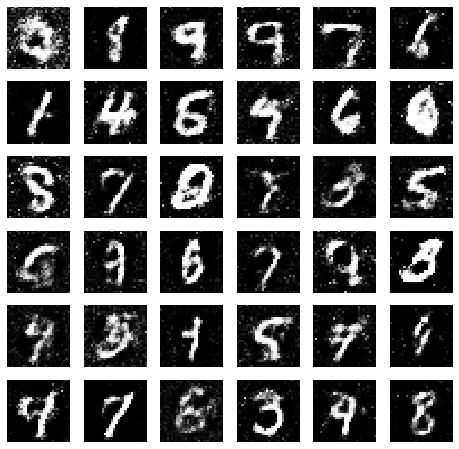

epoch 13


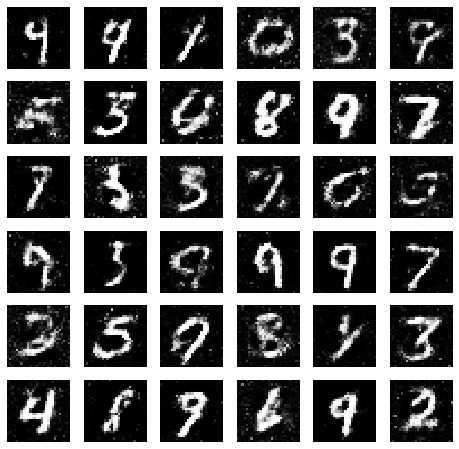

epoch 14


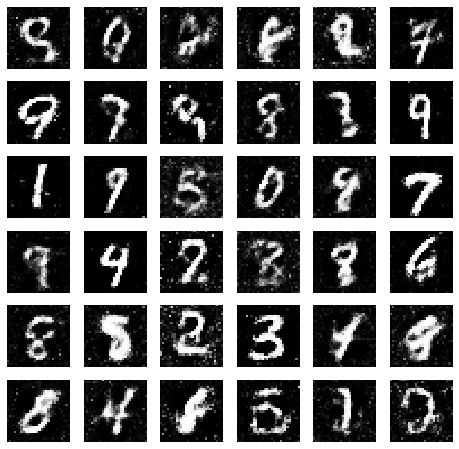

epoch 15


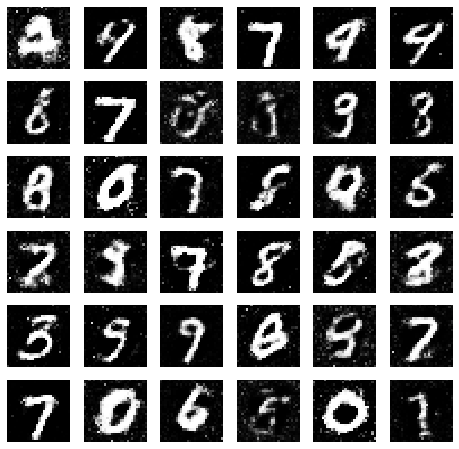

epoch 16


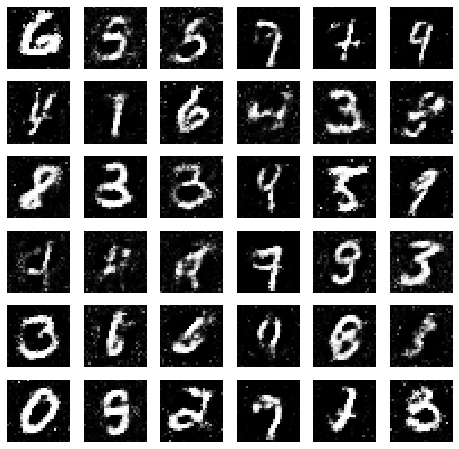

epoch 17


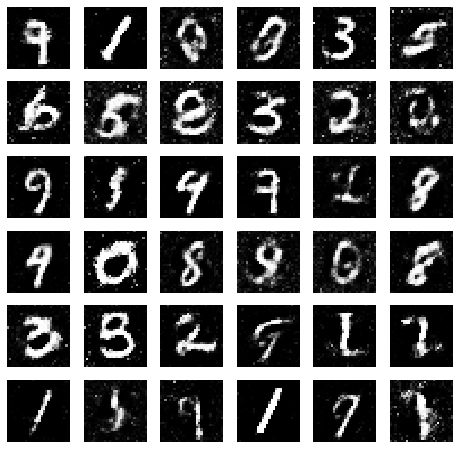

epoch 18


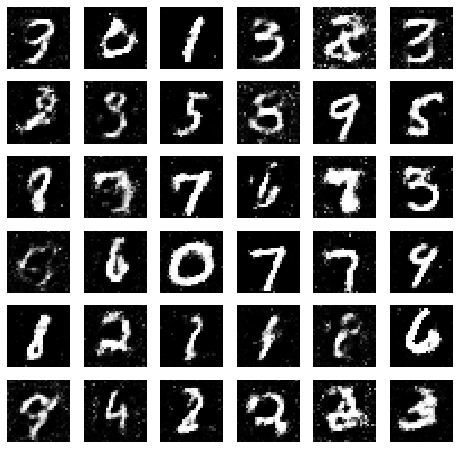

epoch 19


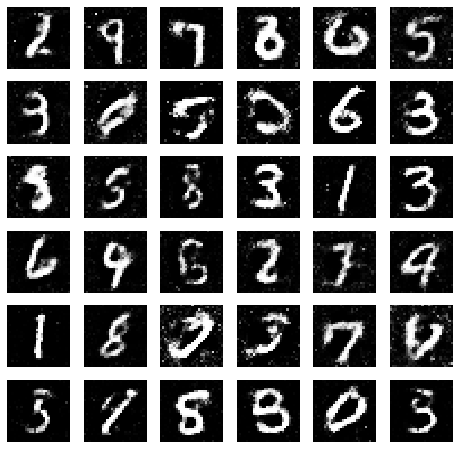

epoch 20


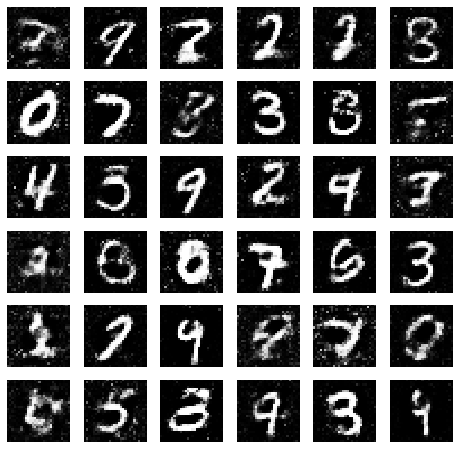

In [14]:
# 1 epoch당 실행할 step의 수를 계산합니다. 
# 파이썬의 '//' 연산자는 나누기 연산자에서 결과의 소수점 부분을 버리는 연산자입니다. ex) 3/2 = 1.5, 3//2 = 1
step_size = len(x)//batch_size

for epoch in range(epochs):
    # 판별자와 생성자를 번갈아가며 학습합니다.
    for _ in range(step_size):
        # ============
        # 판별자 학습 단계
        # ============
        
        # Mode Collapse를 방지하기 위해 판별자를 여러번 학습할 수 있습니다.
        for _ in range(3):
            # 판별자를 학습시킬 진짜 데이터의 인덱스를 임의로 선택합니다.
            idx = np.random.randint(0, x.shape[0], batch_size)
            imgs = x[idx]
            
            # 생성자에 입력으로 넣을 latent_dimension 크기 만큼의 노이즈를 표준 정규분포에서 batch_size 개수만큼 추출합니다.
            noise = np.random.normal(0, 1, (batch_size, latent_dim))

            # 추출한 노이즈를 생성자에 넣어 판별자를 학습시킬 가짜 데이터를 생성합니다.
            gen_imgs = generator.predict(noise)

            # 판별자를 학습합니다. 
            # 진짜 이미지 데이터와 1로 채워진 레이블을 전달하여 진짜 데이터를 학습합니다.
            d_loss_real = discriminator.train_on_batch(imgs, valid)
            # 가짜 이미지 데이터와 0로 채워진 레이블을 전달하여 가짜 데이터를 학습합니다.
            d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        # ============
        # 생성자 학습 단계
        # ============
        
        # 노이즈 생성
        noise = np.random.normal(0, 1, (batch_size, latent_dim))

        # 생성자 학습(생성자의 목적은 판별자를 속이는 것이기 때문에 가짜 데이터를 넣으면서 
        # 정답 레이블을 1로 주어 생성자를 학습 시킵니다.)
        g_loss = combined_model.train_on_batch(noise, valid)

    # 에폭마다 생성된 이미지를 출력합니다.
    sample_images(epoch)

### Reference
- GAN : https://github.com/eriklindernoren/Keras-GAN , Naver Labs, http://jaejunyoo.blogspot.com/2017/01/generative-adversarial-nets-1.html
- Mode collapse : http://jaejunyoo.blogspot.com/2017/02/unrolled-generative-adversarial-network-1.html
- Pix2Pix Demo : 
- Goodfellow, I. J., Pouget-Abadie, J., Mirza, M., Xu, B., Warde-Farley, D., Ozair, S., Courville, A., and Bengio, Y. (2014). Generative adversarial nets. In NIPS’2014.